## How-To
This notebook demonstrates and attempts to explain the pyseater program using an environment called Jupyter Lab. If you have not used Jupyter before it's worth reading these few bullets before continueing.
- A notebook is composed of cells. There are two types of cells: those containing text for humans like this one and those containing code that will be executed.
- `Code` cells may be executed one-by-one or as an ordered batch. Use the *play* button above to execute a single highlighted cell or choose *Run all cells* to run everything from the *Run* drop down menu above.
- __Important__. The Jupyter Lab environment makes it easy to experiment. You can modify the code in the code cells and immediately run and see the results, or errors. It is always a good idea to __restart the kernel__ to ensure that you have a clean start after making changes, otherwise you may get unexpected results and waste time debugging problems that aren't there. You can do this from the *Run* and *Kernel* drop down menus above, e.g. *Restart Kernel and Run All Cells* from the Run menu.

### Preamble.
Import the pyseater functionality nicknamed "ps" and create a parameter set and an instance of the pyseater called seater. A parameter set has default values so there is no need to set anything, e.g. `n_rows` and `n_cols` are by default set to `10`. Parameters can be modified set like this: `params.n_rows = 15`.

In [1]:
import pyseater as ps
params = ps.Parameters()
seater = ps.Pyseater(params.n_rows, params.n_cols)

### Create initial floorplan
First we need to specify the floorplan of the room for which we want to generate a seating plan. A floorplan is a collection of tables arranged on a 2D grid of `n_rows * n_cols` cells. Tables are composed of places where each place occupies one cell of the floorplan grid. Tables are *divided* either horizonatally or vertically with students facing *opposite* each other across this dividing line.

To add tables we call `add_table` specifying the start coordinate of the new table and, in a call to the table constructor, the width x height dimensions of the table and the desired direction of *division*. Note that one dimension of the table must always be 2, and the division should always split a dimension of 2 otherwise we'll encounter impossible floorplans and strange behaviour.

After specifying the tables you can display the floorplan with a call to `seater.draw_floorplan(params)` as demonstrated.

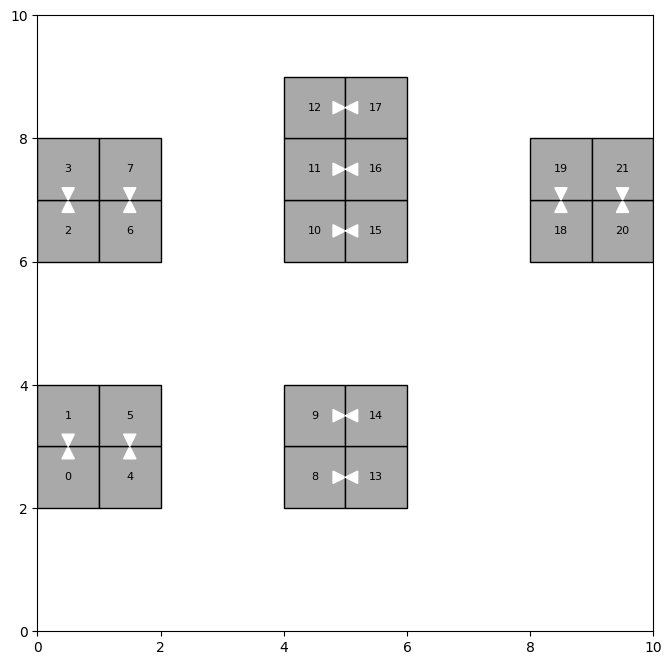

In [2]:
seater.add_table(0, 2, ps.Table(2, 2, ps.Divide.HORIZONTAL))
seater.add_table(4, 2, ps.Table(2, 2, ps.Divide.VERTICAL))
seater.add_table(8, 6, ps.Table(2, 2, ps.Divide.HORIZONTAL))
seater.add_table(4, 6, ps.Table(2, 3, ps.Divide.VERTICAL))
seater.add_table(0, 6, ps.Table(2, 2, ps.Divide.HORIZONTAL))

seater.draw_floorplan(params)

### Read Students and do Random Assignment
The call to `do_random_assignment` first reads as many students from the data file as there are places in the floorplan. Note that there must be at least as many students as there are places in the floorplan, if not the program will crash with an error. The data file has a default value in `params` and can be set to anything else e.g. `params.student_file = "data/some-other-file.csv"`.

__The structure of the data file is crucial__ for everything that follows. The data file should be a well formed comma seperated values (CSV) file where the first row gives the column headers and each subsequent row gives the corresponding data per student. The __column headers are the student attributes__ which will be subject to rules later. It is possible to apply rules to any column/attribute. If a column/attribute named "colour" is present it will be used when displaying resultant floorplans, a list of valid colours can be found [here](https://cs111.wellesley.edu/labs/lab02/colors). The first three columns/attributes will be used as labels in the floorplans. Have a look in the `data/` subdirectory for some example data files. The file being used for this demo is `data/students.csv`.

Once loaded, students are randomly assigned to the available places, `draw_floorplan` to see the result.

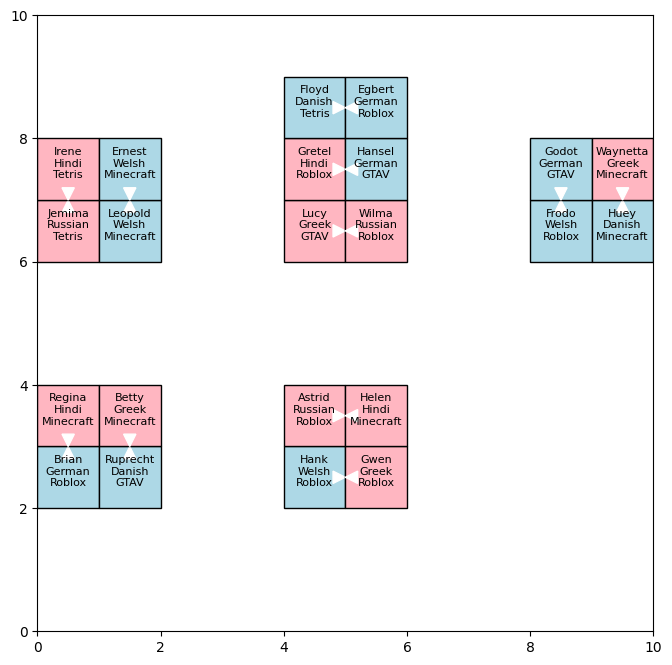

In [3]:
seater.do_random_assignment(params)
seater.draw_floorplan(params)

### Specify some rules
Seating plan rules are applied to pairs of students either sitting adjacent to or opposite one another. Rules are based upon student attributes as named in the column headers of the student data file. Rules on attributes are binary meaning that the chosen student attribute must either __match__, or it must __not match__. 

The seater has two initially empty rule sets which we can populate, `adj_rules` applied to students sitting adjacent to one another and `ops_rules` applied to students sitting opposite one another. 

For instance, in the following code cell, the line `seater.adj_rules.append(ps.Rule("gender", False))` adds a rule specifying that students sitting next to each other shall have different genders. The following line/rule specifies the same but for students sitting opposite. Since the data file includes a colour column with values corresponding to the values of the gender column we can expect a nice checkerboard pattern in the resulting floorplan. 

In [4]:
seater.adj_rules.append(ps.Rule("gender", False))
seater.ops_rules.append(ps.Rule("gender", False))

# seater.adj_rules.append(ps.Rule("language", False))
# seater.adj_rules.append(ps.Rule("game", False))

### Solve!
At this point we have a floorplan, a collection of students with attributes and a set of rules that will be applied to arrive at some floorplan, so all that is left is to solve! The call to `seater.solve` might take some time depending on how many rules have been specified and on what attributes. 

Once we have our floorplan we display it as usual. In this case the call to `draw_floorplan` has an additonal argument, `seater.draw_floorplan(params, "save-figure-demo")`, which tells seater to also save the resultant floorplan as a file. This is handy as it can then be opened in a new browser tab and enlarged without all the Jupyterlab clutter - handy for showing on a big screen to a classroom full of children.

Applying rules:
	adjacent: gender = False
	opposite:gender = False

SUCCESS, 100.0% after 249 iterations, in 0.01 seconds. Throughput: 25465.27


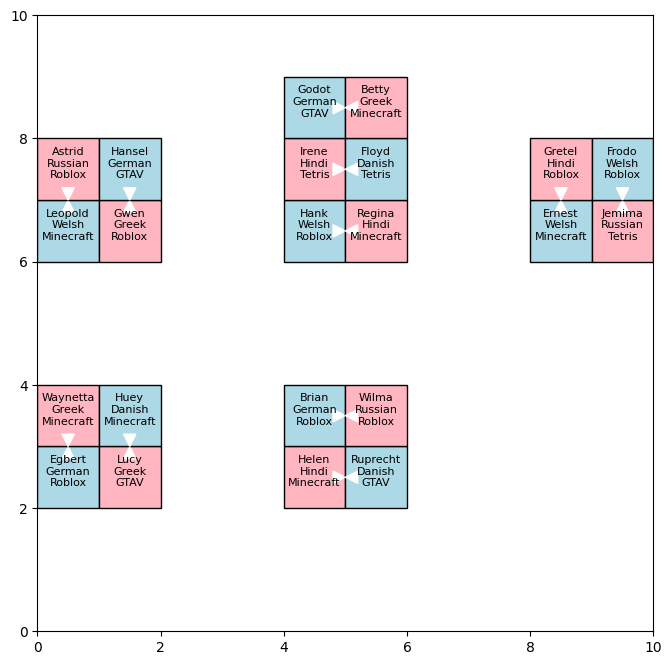

saving: save-figure-demo as 04-05-2025_11:24:29_save-figure-demo.svg


In [5]:
# params.target_fitness = 90
seater.solve(params)
seater.draw_floorplan(params, "save-figure-demo")

### Note on Solution Fitness
In the background, what `solve` is doing is trying to find a floorplan that adheres to the rules that we specify. Even with a small number of students and places the number of unrestrained floorplans quickly gets into the trillions. Depending on the rules and combinations of rules specified and the data provided the number of adherent floorplans might be very small or even zero. Contradictory rules will also yield zero adherent floorplans. For this reason we can specify `target_fitness`.

Target fitness is the measure of solution quality used internally by the solver and by default is set to 100%, i.e. solution floorplans adhereing fully to all specified rules. If `solve` is taking too long or we suspect that our choice of rules might be too restrictive we can reduce the target fitness as follows, before calling `solve`:

`params.target_fitness = 90`

Here we are telling seater to halt `solve` when a solution that is 90% good is found. You can experiment with this by uncommenting the same line in the previous code cell and rerunning and seeing how the floorplan changes and no longer strictly adheres to the rules we specified.
